In [465]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Question 1

## Section 1

In [466]:
def get_target(vector):
    return 1 + vector + vector**2 + vector**3


In [467]:
domain = np.arange(start=-5.0, stop=5.0, step=0.01)
image = get_target(domain)

In [468]:
P = 500
x = np.random.uniform(low=-5.0, high=5.0, size=P)
x_by_input = np.row_stack((np.repeat(1, P), x))
y = get_target(x)


In [469]:
def get_weights_by_inverse_correlation_matrix(x, y):
    C = (x @ x.T) / x.shape[1]
    C_inverse = np.linalg.inv(C)
    u = (y.T @ x.T) / x.shape[1]
    w = C_inverse @ u
    return w


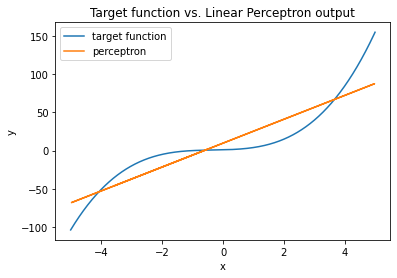

In [470]:
w = get_weights_by_inverse_correlation_matrix(x=x_by_input, y=y)
y_avarage = x_by_input.T @ w

plt.plot(domain, image, label="target function")
plt.plot(x, y_avarage, label="perceptron")
plt.legend()
plt.title("Target function vs. Linear Perceptron output")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


## Section 2

In [471]:
def get_train_error(P, y, y_avarage):
    train_error = (1 / (2 * P)) * np.sum((y_avarage - y)**2)
    return train_error


In [472]:
def get_generalizaion_error(w):
    y_general = np.row_stack((np.repeat(1, domain.shape[0]), domain)).T @ w
    generalizaion_error = (1 / (2 * domain.shape[0])) * np.sum((image - y_general)**2)
    return generalizaion_error


In [473]:
print("Training Error")
print(get_train_error(P, y, y_avarage))
print("Generalization Error")
print(get_generalizaion_error(w))


Training Error
197.47693209777185
Generalization Error
206.05797278221203


# Question 2

In [474]:
def learning_simulation(p, iterations=100):
    train_errors = np.zeros(iterations)
    generalizaion_errors = np.zeros(iterations)
    for i in range(iterations):
        x = np.random.uniform(low=-5.0, high=5.0, size=p)
        x_by_input = np.row_stack((np.repeat(1, p), x))
        y = get_target(x)
        w = get_weights_by_inverse_correlation_matrix(x=x_by_input, y=y)
        y_avarage = x_by_input.T @ w
        train_errors[i] = get_train_error(p, y, y_avarage)
        generalizaion_errors[i] = get_generalizaion_error(w)
    return np.mean(train_errors), np.mean(generalizaion_errors)


In [475]:
P = pd.Series(np.arange(5, 101, step=5), name="P")
results = pd.DataFrame.from_records(P.apply(lambda p: learning_simulation(p)), columns=[
                                    "training", "generalizaion"])
experiment = pd.concat([P, results], axis=1)
experiment.head()


,P,training,generalizaion
0,5,96.757947,428.732312
1,10,149.851269,275.332790
2,15,166.842768,247.771589
3,20,174.487571,229.130617
4,25,184.027434,227.350020


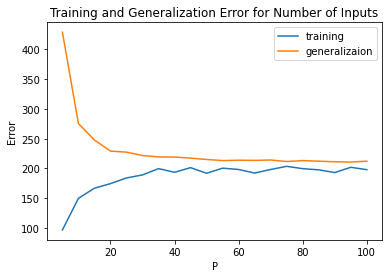

In [476]:
experiment.plot(x="P")
plt.title("Training and Generalization Error for Number of Inputs")
plt.ylabel("Error")
plt.show()

# Question 3

In [477]:
def batch_gradient_learning(w, eta, x, y):
    gradient = np.mean(
        np.array([x[0, :] * (x.T @ w - y),  x[1, :] * (x.T @ w - y)]), axis=1)
    return w - (eta * gradient)


In [478]:
def online_gradient_learning(w, eta, x, y):
    gradient = (x.T @ w - y) * x
    return w - (eta * gradient)


In [479]:
P = 100
eta = 0.01
x = np.random.uniform(low=-5.0, high=5.0, size=P)
x_by_input = np.row_stack((np.repeat(1, P), x))
y = get_target(x)

In [480]:
batch_train_errors = np.zeros(P)
batch_generalizaion_errors = np.zeros(P)
w = np.array([1, 1])

for i in range(100):
    w = batch_gradient_learning(w, eta, x_by_input, y)
    y_avarage = x_by_input.T @ w
    batch_train_errors[i] = get_train_error(P, y, y_avarage)
    batch_generalizaion_errors[i] = get_generalizaion_error(w)


In [481]:
online_training_errors = np.zeros(P)
online_generalizaion_errors = np.zeros(P)
w = np.array([1, 1])

for i, col in enumerate(np.random.choice(x_by_input.shape[1], size=P, replace=False)):
    x = x_by_input[:, col]
    label = y[col]
    w = online_gradient_learning(w, eta, x, label)
    y_avarage = x_by_input.T @ w
    online_training_errors[i] = get_train_error(P, y, y_avarage)
    online_generalizaion_errors[i] = get_generalizaion_error(w)


In [482]:
w = get_weights_by_inverse_correlation_matrix(x_by_input, y)
y_avarage = x_by_input.T @ w
correlation_training_error = get_train_error(P, y, y_avarage)
correlation_generalizaion_error = get_generalizaion_error(w)

In [483]:
results = pd.DataFrame({
    "batch training error": batch_train_errors,
    "batch generalization error": batch_generalizaion_errors,
    "online training error": online_training_errors,
    "online generalization error": online_generalizaion_errors,
    "correlation inverse training error": np.repeat(correlation_training_error, P),
    "correlation inverse generalization error": np.repeat(correlation_generalizaion_error, P)
}, index=np.arange(100))
results.head()


,batch training error,batch generalization error,online training error,online generalization error,correlation inverse training error,correlation inverse generalization error
0,1140.955605,1017.825350,1305.383490,1173.664816,228.180076,208.446396
1,1001.163278,885.952645,1299.699005,1168.387957,228.180076,208.446396
2,883.691332,775.660254,1206.081001,1078.402320,228.180076,208.446396
3,784.956971,683.440300,1203.228805,1075.768434,228.180076,208.446396
4,701.952877,606.352150,1180.682216,1054.065031,228.180076,208.446396


# Question 4

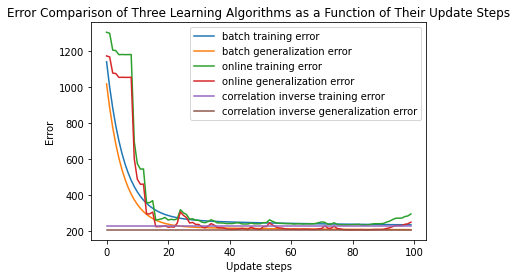

In [484]:
results.plot()
plt.title("Error Comparison of Three Learning Algorithms as a Function of Their Update Steps")
plt.xlabel("Update steps")
plt.ylabel("Error")
plt.show()


הפונקצייה של היפוך מטריצת הקורלציה היא היציבה ביותר, אפשר להסביר זאת כי זאת פונקציה לא איטרטיבית. בנוסף, הפונקצייה הזאת מגיעה לתוצאות הטובות ביותר, זאת מכיוון שאנו מחשבים את המשקולות מראש, זאת בניגוד לאלגוריתמים האחרים.

באלגוריתם באטצ' אנו מאתחלים את האלגוריתם במשקולות רנדומיות, ולכן ישנה שגיאה גדולה בתחילת בהתחלה. בנוסף ניתן לראת כי כל עדכון מקרב אותנו לנקודת המינימום הגדולבלים בה השגיאה בריבוע היא הקטנה ביותר. אפשר להסביר את זה בגלל שהפונקציה קמורה בגלל קצב הלימוד הנמוך.

העיקרון העיקרי נשמע גם בפונקציית אונליין, אך השוני הוא שבמקום למזער את כל פונציית שגיאות האימון, אנו ממזערים רק את השגיאה בדוגמה אקראית. 
הבדל זה מבייוצר שונות גדולה בהרבה של פונקציית השגיאה בהשוואה לבאטצ'